### **Capstone Project Group 5: RFM & CLV analyses and PCA Clustering**


---



---



In [ ]:
import pandas as pd

In [ ]:
# Load the Orders Excel file
orders_file = pd.ExcelFile('/content/Orders2.0.xlsx')

In [ ]:
# Display sheet names to understand what we're working with
sheet_names = orders_file.sheet_names
print(sheet_names)

['scanner_data', 'product description ']


In [ ]:
# Load the two sheets into separate DataFrames
scanner_data_df = pd.read_excel(orders_file, sheet_name='scanner_data')
product_description_df = pd.read_excel(orders_file, sheet_name='product description ')

In [ ]:
# Display the first few rows of each dataframe to understand their structure
scanner_data_df.head(), product_description_df.head()

(   id       Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
 0   1 2021-01-02         2547               1          X52  0EM7L       1.0   
 1   2 2021-01-02          822               2          2ML  68BRQ       1.0   
 2   3 2021-01-02         3686               3          0H2  CZUZX       1.0   
 3   4 2021-01-02         3719               4          0H2  549KK       1.0   
 4   5 2021-01-02         9200               5          0H2  K8EHH       1.0   
 
    Sales_Amount  
 0          3.13  
 1          5.46  
 2          6.35  
 3          5.59  
 4          6.88  ,
   SKU_Category    SKU                                       description 
 0          X52  0EM7L  U.S. Polo Assn. Kids Girls Pink & Blue Printed...
 1          2ML  68BRQ  W Women Off-White & Charcoal Grey Printed Stra...
 2          0H2  CZUZX    Studio Voylla Gold-Toned & Green Square Jhumkas
 3          0H2  549KK  Roadster Women Black Skinny Fit Mid-Rise Mildl...
 4          0H2  K8EHH  AURELIA W

In [ ]:
# Perform an inner join on the two DataFrames using 'SKU' and 'SKU_Category' as keys
merged_df = pd.merge(scanner_data_df, product_description_df, on=['SKU', 'SKU_Category'], how='inner')


merged_df.head()


,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,description
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
1,627,2021-01-04,289,325,X52,0EM7L,1.0,3.13,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
2,4264,2021-01-14,8283,2018,X52,0EM7L,1.0,3.13,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
3,5200,2021-01-17,3451,2472,X52,0EM7L,1.0,3.13,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
4,8218,2021-01-26,6569,3942,X52,0EM7L,1.0,3.13,U.S. Polo Assn. Kids Girls Pink & Blue Printed...


In [ ]:
# Load the Customers data
customers_df = pd.read_excel('/content/Customers.xlsx')
customers_df.head()

,Customer_ID,GENDER,AGE,GEOGRAPHY
0,2547,M,43,Greece
1,822,M,42,Spain
2,3686,F,39,France
3,3719,F,30,Italy
4,9200,F,31,Italy


In [ ]:
# Perform an inner join on the merged DataFrame and the Customer data using 'Customer_ID' as the key
final_merged_df = pd.merge(merged_df, customers_df, on='Customer_ID', how='inner')

# Display the first few rows of the final merged dataframe
final_merged_df.head()


,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,description,GENDER,AGE,GEOGRAPHY
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,U.S. Polo Assn. Kids Girls Pink & Blue Printed...,M,43,Greece
1,37202,2021-04-16,2547,18247,TVL,6ASJR,1.0,6.00,Roadster Women Navy Blue Striped Mandarin Coll...,M,43,Greece
2,27608,2021-03-21,2547,13396,N8U,UQC6F,3.0,5.32,FAUSTO Women Pink Sneakers,M,43,Greece
3,34932,2021-04-11,2547,17148,N8U,UQC6F,3.0,5.32,FAUSTO Women Pink Sneakers,M,43,Greece
4,34934,2021-04-11,2547,17148,P42,6RXA9,1.0,5.62,Moedbuille Women Pink & Greman Silver Necklace,M,43,Greece


DATA CLEANING:
1. Ensure correct dat types (e.g., dates are datetime, numeric columns are floats/integers).

2. Check for NaNs or NULL values





In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              131706 non-null  int64         
 1   Date            131706 non-null  datetime64[ns]
 2   Customer_ID     131706 non-null  int64         
 3   Transaction_ID  131706 non-null  int64         
 4   SKU_Category    131706 non-null  object        
 5   SKU             131706 non-null  object        
 6   Quantity        131706 non-null  float64       
 7   Sales_Amount    131706 non-null  float64       
 8   description     131706 non-null  object        
 9   GENDER          131706 non-null  object        
 10  AGE             131706 non-null  int64         
 11  GEOGRAPHY       131706 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 12.1+ MB


In [ ]:
final_merged_df.describe()

,id,Date,Customer_ID,Transaction_ID,Quantity,Sales_Amount,AGE
count,131706.000000,131706,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,2021-07-04 21:39:26.379663616,12386.450367,32389.604187,1.485318,11.981524,35.423823
min,1.000000,2021-01-02 00:00:00,1.000000,1.000000,0.010000,0.020000,18.000000
25%,32927.250000,2021-04-05 00:00:00,7349.000000,16134.000000,1.000000,4.230000,31.000000
50%,65853.500000,2021-07-02 00:00:00,13496.000000,32620.000000,1.000000,6.920000,36.000000
75%,98779.750000,2021-10-07 00:00:00,17306.000000,48548.000000,1.000000,12.330000,40.000000
max,131706.000000,2021-12-31 00:00:00,22625.000000,64682.000000,400.000000,707.730000,62.000000
std,38020.391614,NaN,6086.447552,18709.901238,3.872666,19.359699,7.064370


Our dataset doesn't contain any missing values: "Non_Null Count" is equal to "Count" for all columns.

Also the data types look appropriate.

No changes are needed.


3. Check for and remove any duplicate rows

In [ ]:
duplicate_rows = final_merged_df.duplicated()

# Remove duplicates
final_merged_df_cleaned = final_merged_df[~duplicate_rows]

# Count of removed duplicates
duplicates_removed = duplicate_rows.sum()

duplicates_removed, final_merged_df_cleaned.shape


(0, (131706, 12))

There were no duplicate rows in the dataset, so no rows were removed.

4. Check for logical consistency in 'Sales_Amount' : any negative values would not make sens in context of sales

In [ ]:
negative_sales = final_merged_df_cleaned[final_merged_df_cleaned['Sales_Amount'] < 0]

negative_sales_count = negative_sales.shape[0]
negative_sales_count


0

In [ ]:
df1 = final_merged_df_cleaned

In [ ]:
print(df1.head())

      id       Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0      1 2021-01-02         2547               1          X52  0EM7L   
1  37202 2021-04-16         2547           18247          TVL  6ASJR   
2  27608 2021-03-21         2547           13396          N8U  UQC6F   
3  34932 2021-04-11         2547           17148          N8U  UQC6F   
4  34934 2021-04-11         2547           17148          P42  6RXA9   

   Quantity  Sales_Amount                                       description   \
0       1.0          3.13  U.S. Polo Assn. Kids Girls Pink & Blue Printed...   
1       1.0          6.00  Roadster Women Navy Blue Striped Mandarin Coll...   
2       3.0          5.32                         FAUSTO Women Pink Sneakers   
3       3.0          5.32                         FAUSTO Women Pink Sneakers   
4       1.0          5.62     Moedbuille Women Pink & Greman Silver Necklace   

  GENDER  AGE GEOGRAPHY  
0      M   43    Greece  
1      M   43    Greece  
2      M

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              131706 non-null  int64         
 1   Date            131706 non-null  datetime64[ns]
 2   Customer_ID     131706 non-null  int64         
 3   Transaction_ID  131706 non-null  int64         
 4   SKU_Category    131706 non-null  object        
 5   SKU             131706 non-null  object        
 6   Quantity        131706 non-null  float64       
 7   Sales_Amount    131706 non-null  float64       
 8   description     131706 non-null  object        
 9   GENDER          131706 non-null  object        
 10  AGE             131706 non-null  int64         
 11  GEOGRAPHY       131706 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 12.1+ MB


In [ ]:
# Summary statistics for numerical variables
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
id,131706.0,65853.5,1.0,32927.25,65853.5,98779.75,131706.0,38020.391614
Date,131706,2021-07-04 21:39:26.379663616,2021-01-02 00:00:00,2021-04-05 00:00:00,2021-07-02 00:00:00,2021-10-07 00:00:00,2021-12-31 00:00:00,NaN
Customer_ID,131706.0,12386.450367,1.0,7349.0,13496.0,17306.0,22625.0,6086.447552
Transaction_ID,131706.0,32389.604187,1.0,16134.0,32620.0,48548.0,64682.0,18709.901238
Quantity,131706.0,1.485318,0.01,1.0,1.0,1.0,400.0,3.872666
Sales_Amount,131706.0,11.981524,0.02,4.23,6.92,12.33,707.73,19.359699
AGE,131706.0,35.423823,18.0,31.0,36.0,40.0,62.0,7.06437


In [ ]:
# Summary statistics for categorical variables
df1.describe(include='object').T

,count,unique,top,freq
SKU_Category,131706,187,N8U,10913
SKU,131706,5242,UNJKW,2007
description,131706,5242,GNIST Women Pink Solid Heels,2007
GENDER,131706,2,F,73136
GEOGRAPHY,131706,7,Germany,37959


In [ ]:
# Finding the number of unique stock codes
unique_stock_codes = df1['SKU'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 5242


In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

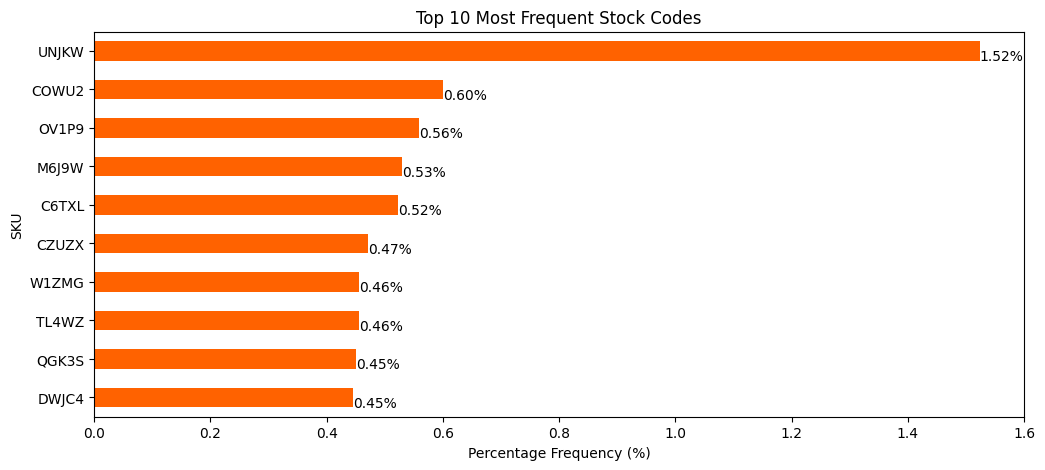

In [ ]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df1['SKU'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('SKU')
plt.gca().invert_yaxis()
plt.show()

#RFM Analysis


An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences. You can do many different segmentations according to what you are trying to achieve. If you want to increase retention rate, you can do a segmentation based on churn probability and take actions. But there are very common and useful segmentation methods as well. Now we are going to implement one of them to our business: RFM. RFM stands for Recency - Frequency - Monetary Value. Theoretically we will have segments like below:

• Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.

• Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.

• High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

we need to calculate Recency, Frequency and Monetary Value (we will call it Revenue from now on) and apply unsupervised machine learning to identify different groups (clusters) for each. Let’s jump into coding and see how to do RFM Clustering.

RFM (Recency, Frequency, Monetary) Analysis is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.

Our goal in this Notebook is to cluster the customers in our data set to: • Recognize who are our most valuable customers

• Increase revenue

• Increase customer retention

• Learn more about the trends and behaviors of our customers

• Define customers that are at risk

We will start with RFM Analysis and then compliment our findings with predictive analysis using K-Means Clustering Algorithms.

RFM Analysis answers the following questions:

• Who are our best customers?

• Who has the potential to be converted into more profitable customers?

• Which customers do we need to retain?

• Which group of customers is most likely to respond to our marketing campaign?

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

• Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

• Frequency (F): This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

• Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

# **Recency (R)**

In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

• Days Since Last Purchas: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.

In [ ]:
# Convert Date to datetime type
df1['Date'] = pd.to_datetime(df1['Date'])

# Convert Date to datetime and extract only the date
df1['Day'] = df1['Date'].dt.date

# Find the most recent purchase date for each customer
customer_data = df1.groupby('Customer_ID')['Day'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df1['Day'].max()

# Convert Day to datetime type before subtraction
customer_data['Day'] = pd.to_datetime(customer_data['Day'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['Day']).dt.days

# Remove the Day column
customer_data.drop(columns=['Day'], inplace=True)

Now, customer_data dataframe contains the Days_Since_Last_Purchase feature:

In [ ]:
customer_data.head()

,Customer_ID,Days_Since_Last_Purchase
0,1,343
1,2,195
2,3,363
3,4,52
4,5,179


Note:
I've named the customer-centric dataframe as customer_data, which will eventually contain all the customer-based features we plan to create.

# **Frequency (F)**
In this step, we are going to create two features that quantify the frequency of a customer's engagement with the retailer:

Total Transactions: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer.

Total Products Purchased: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.
These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.

In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df1.groupby('Customer_ID')['Transaction_ID'].nunique().reset_index()
total_transactions.rename(columns={'Transaction_ID': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df1.groupby('Customer_ID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='Customer_ID')
customer_data = pd.merge(customer_data, total_products_purchased, on='Customer_ID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,1,343,1,2.0
1,2,195,2,2.0
2,3,363,1,4.0
3,4,52,2,5.0
4,5,179,5,14.0


# **Monetary (M)**
In this step, we are going to create two features that represent the monetary aspect of customer's transactions:

Total Spend: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of UnitPrice and Quantity for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.
Average Transaction Value: This feature is calculated as the Total Spend divided by the Total Transactions for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [ ]:
# Calculate the total spend by each customer
df1['Total_Spend'] = df1['Sales_Amount'] * df1['Quantity']
total_spend = df1.groupby('Customer_ID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='Customer_ID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='Customer_ID')
customer_data = pd.merge(customer_data, average_transaction_value[['Customer_ID', 'Average_Transaction_Value']], on='Customer_ID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,1,343,1,2.0,16.29,16.290
1,2,195,2,2.0,22.77,11.385
2,3,363,1,4.0,19.08,19.080
3,4,52,2,5.0,33.29,16.645
4,5,179,5,14.0,248.27,49.654


Product Diversity

# **Product Diversity**

In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

Unique Products Purchased: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [ ]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df1.groupby('Customer_ID')['SKU'].nunique().reset_index()
unique_products_purchased.rename(columns={'SKU': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='Customer_ID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,1,343,1,2.0,16.29,16.290,2
1,2,195,2,2.0,22.77,11.385,2
2,3,363,1,4.0,19.08,19.080,3
3,4,52,2,5.0,33.29,16.645,5
4,5,179,5,14.0,248.27,49.654,2


# **Behavioral Features**

In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

Average Days Between Purchases: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.
Favorite Shopping Day: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.
Favorite Shopping Hour: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.
By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.

In [ ]:
# Extract day of week and hour from Date
df1['Day_Of_Week'] = df1['Date'].dt.dayofweek
df1['Hour'] = df1['Date'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df1.groupby('Customer_ID')['Day'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('Customer_ID').mean().reset_index()
average_days_between_purchases.rename(columns={'Day': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df1.groupby(['Customer_ID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df1.groupby(['Customer_ID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='Customer_ID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='Customer_ID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='Customer_ID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

<ipython-input-28-2f3d8f180d65>:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = df1.groupby('Customer_ID')['Day'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))


,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,1,343,1,2.0,16.29,16.290,2,0.0,4,0
1,2,195,2,2.0,22.77,11.385,2,87.0,2,0
2,3,363,1,4.0,19.08,19.080,3,0.0,5,0
3,4,52,2,5.0,33.29,16.645,5,0.0,1,0
4,5,179,5,14.0,248.27,49.654,2,36.5,0,0


# **Geographic Features**

In this step, we will introduce a geographic feature that reflects the geographical location of customers. Understanding the geographic distribution of customers is pivotal for several reasons:

Country: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.

In [ ]:
df1['GEOGRAPHY'].value_counts(normalize=True).head()

,proportion
GEOGRAPHY,
Germany,0.288210
Italy,0.259047
France,0.168960
Greece,0.097368
Spain,0.076443


**Methodology:**

•	First, we will group the data by CustomerID and Country and calculate the number of transactions per country for each customer.

•	Next, we will identify the main country for each customer (the country from which they have the maximum transactions).

•	Finally, we will merge this information with the customer_data dataframe to include the new feature in our analysis.

In [ ]:
# Group by Customer_ID and Country to get the number of transactions per country for each customer
customer_country = df1.groupby(['Customer_ID', 'GEOGRAPHY']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('Customer_ID')

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['Customer_ID','GEOGRAPHY']], on='Customer_ID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,GEOGRAPHY
0,1,343,1,2.0,16.29,16.290,2,0.0,4,0,UK
1,2,195,2,2.0,22.77,11.385,2,87.0,2,0,Germany
2,3,363,1,4.0,19.08,19.080,3,0.0,5,0,UK
3,4,52,2,5.0,33.29,16.645,5,0.0,1,0,UK
4,5,179,5,14.0,248.27,49.654,2,36.5,0,0,Germany


In [ ]:
pip install numpy scipy

In [ ]:
import numpy as np
from scipy.stats import linregress

**Seasonality & Trends**

In this step, I will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

Monthly_Spending_Mean: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.
Monthly_Spending_Std: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.
Spending_Trend: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.
By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.

In [ ]:
# Extract month and year from InvoiceDate
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df1.groupby(['Customer_ID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('Customer_ID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('Customer_ID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='Customer_ID')
customer_data = pd.merge(customer_data, spending_trends, on='Customer_ID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,GEOGRAPHY,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,1,343,1,2.0,16.29,16.290,2,0.0,4,0,UK,16.2900,0.000000,0.000
1,2,195,2,2.0,22.77,11.385,2,87.0,2,0,Germany,11.3850,5.112382,7.230
2,3,363,1,4.0,19.08,19.080,3,0.0,5,0,UK,19.0800,0.000000,0.000
3,4,52,2,5.0,33.29,16.645,5,0.0,1,0,UK,16.6450,14.078496,19.910
4,5,179,5,14.0,248.27,49.654,2,36.5,0,0,Germany,62.0675,68.432211,-48.479


In [ ]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['Customer_ID'] = customer_data['Customer_ID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [ ]:
customer_data.head(10)

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,GEOGRAPHY,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,1,343,1,2.0,16.29,16.29,2,0.0,4,0,UK,16.29,0.0,0.0
1,2,195,2,2.0,22.77,11.385,2,87.0,2,0,Germany,11.385,5.112382,7.23
2,3,363,1,4.0,19.08,19.08,3,0.0,5,0,UK,19.08,0.0,0.0
3,4,52,2,5.0,33.29,16.645,5,0.0,1,0,UK,16.645,14.078496,19.91
4,5,179,5,14.0,248.27,49.654,2,36.5,0,0,Germany,62.0675,68.432211,-48.479
5,6,275,1,3.0,25.55,25.55,3,0.0,2,0,Spain,25.55,0.0,0.0
6,13,323,2,3.0,53.24,26.62,3,-15.5,3,0,France,26.62,5.23259,-7.4
7,14,288,4,11.0,451.57,112.8925,8,-0.857143,3,0,Greece,150.523333,130.847996,98.395
8,16,257,2,2.0,62.16,31.08,2,90.0,0,0,Germany,31.08,15.528065,21.96
9,17,354,2,4.0,39.51,19.755,3,2.5,2,0,Italy,39.51,0.0,0.0


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_ID                     16324 non-null  string 
 1   Days_Since_Last_Purchase        16324 non-null  Int64  
 2   Total_Transactions              16324 non-null  Int64  
 3   Total_Products_Purchased        16324 non-null  Float64
 4   Total_Spend                     16324 non-null  Float64
 5   Average_Transaction_Value       16324 non-null  Float64
 6   Unique_Products_Purchased       16324 non-null  Int64  
 7   Average_Days_Between_Purchases  16324 non-null  Float64
 8   Day_Of_Week                     16324 non-null  Int32  
 9   Hour                            16324 non-null  Int32  
 10  GEOGRAPHY                       16324 non-null  string 
 11  Monthly_Spending_Mean           16324 non-null  Float64
 12  Monthly_Spending_Std            

**Outlier Detection and Treatment**

In this section, we will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the Isolation Forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Selecting only numerical columns for fitting the model
numerical_columns = customer_data.select_dtypes(include=[np.number]).columns

# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (using only numerical columns)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data[numerical_columns])

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,GEOGRAPHY,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,1,343,1,2.0,16.29,16.29,2,0.0,4,0,UK,16.29,0.0,0.0,1,0
1,2,195,2,2.0,22.77,11.385,2,87.0,2,0,Germany,11.385,5.112382,7.23,1,0
2,3,363,1,4.0,19.08,19.08,3,0.0,5,0,UK,19.08,0.0,0.0,1,0
3,4,52,2,5.0,33.29,16.645,5,0.0,1,0,UK,16.645,14.078496,19.91,1,0
4,5,179,5,14.0,248.27,49.654,2,36.5,0,0,Germany,62.0675,68.432211,-48.479,1,0


After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named Is_Outlier. We have also calculated the outlier scores which represent the anomaly score of each record.

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:

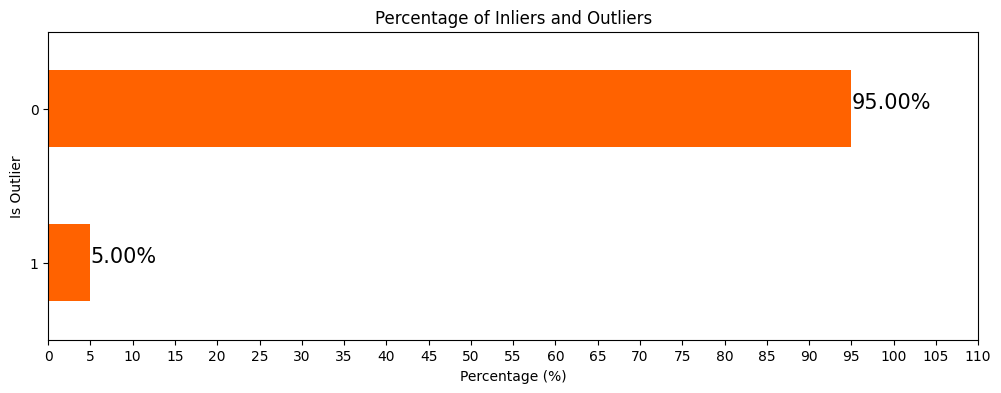

In [ ]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

Inference:
From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

Strategy:
Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

Let's proceed with the following steps:

Separate the identified outliers for further analysis and save them as a separate file (optional).
Remove the outliers from the main dataset to prevent them from influencing the clustering process.
Drop the Outlier_Scores and Is_Outlier columns as they were auxiliary columns used for the outlier detection process.
Let's implement these steps:

In [ ]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

We have successfully separated the outliers for further analysis and cleaned our main dataset by removing these outliers. This cleaned dataset is now ready for the next steps in our customer segmentation project, which includes scaling the features and applying clustering algorithms to identify distinct customer segments.

In [ ]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

15507

In [ ]:
pip install seaborn matplotlib

# **CLV analysis**



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

First we calculated the Customer Lifetime Value (CLV) for a given customer.



In [ ]:
customer_data_cleaned.head()

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,GEOGRAPHY,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,1,343,1,2.0,16.29,16.29,2,0.0,4,0,UK,16.29,0.0,0.0
1,2,195,2,2.0,22.77,11.385,2,87.0,2,0,Germany,11.385,5.112382,7.23
2,3,363,1,4.0,19.08,19.08,3,0.0,5,0,UK,19.08,0.0,0.0
3,4,52,2,5.0,33.29,16.645,5,0.0,1,0,UK,16.645,14.078496,19.91
4,5,179,5,14.0,248.27,49.654,2,36.5,0,0,Germany,62.0675,68.432211,-48.479


In [ ]:
# Calculate average customer lifespan in years, assuming daily transactions
avg_customer_lifespan = customer_data_cleaned['Average_Days_Between_Purchases'].mean() / 365

In [ ]:
def calculate_clv(row, avg_customer_lifespan):
    # CLV Formula: (Average Transaction Value) * (Total Transactions) * (Customer Lifespan)
    return row['Average_Transaction_Value'] * row['Total_Transactions'] * avg_customer_lifespan

Next we iterate through each customer to create a new column in which the CLV is attributed to each customer as a value:

In [ ]:
customer_data_cleaned['CLV'] = customer_data_cleaned.apply(lambda row: calculate_clv(row, avg_customer_lifespan), axis=1)

Histogram to depict the novel CLV variable & Boxplot for each geographical location.

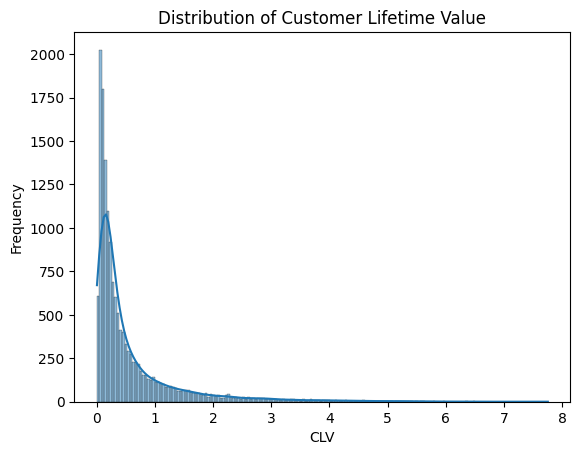

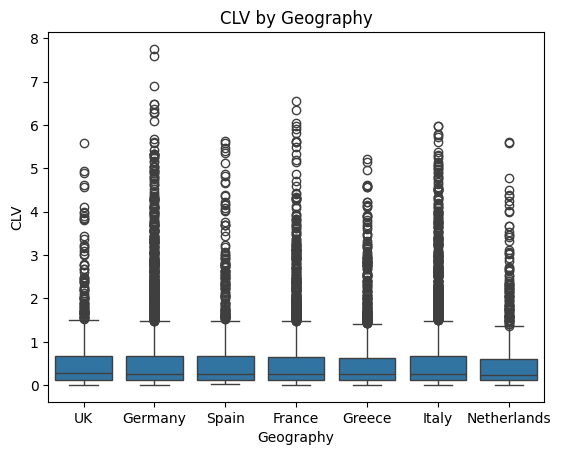

In [ ]:
# Distribution of CLV
sns.histplot(customer_data_cleaned['CLV'], kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

# CLV by Geography
sns.boxplot(x='GEOGRAPHY', y='CLV', data=customer_data_cleaned)
plt.title('CLV by Geography')
plt.xlabel('Geography')
plt.ylabel('CLV')
plt.show()

In [ ]:
customer_data_cleaned.columns #quick check

Index(['Customer_ID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
       'Day_Of_Week', 'Hour', 'GEOGRAPHY', 'Monthly_Spending_Mean',
       'Monthly_Spending_Std', 'Spending_Trend', 'CLV'],
      dtype='object')

# **Correlation Analysis**

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of multicollinearity, where features are highly correlated, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

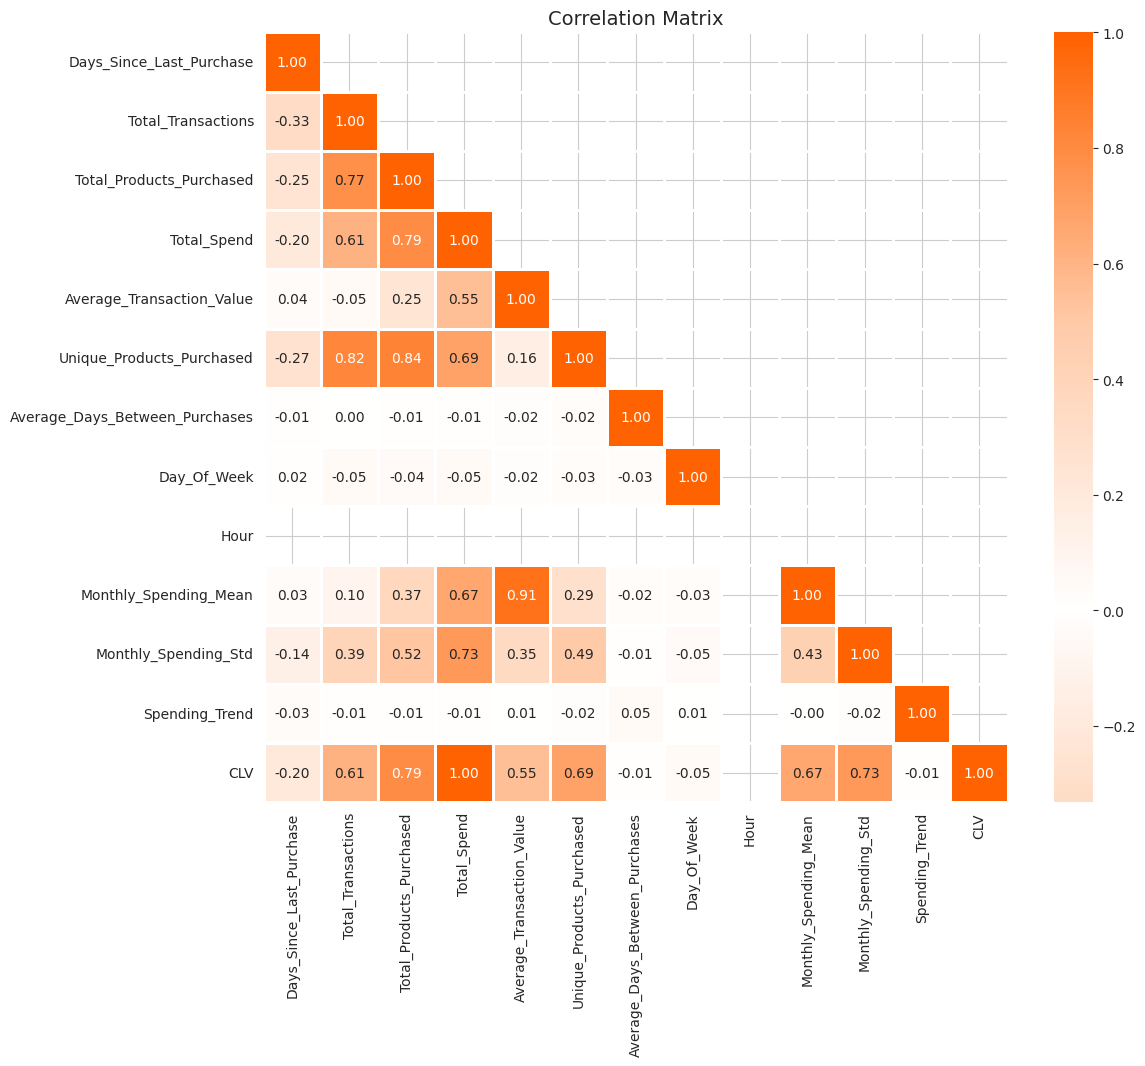

In [ ]:
# Reset background style
sns.set_style('whitegrid')

# Select only numerical columns for the correlation matrix
numerical_data = customer_data_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numerical_data.corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

Inference:
Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

Monthly_Spending_Mean and Average_Transaction_Value
Total_Spend and Total_Products_Purchased
Total_Transactions and Total_Spend
Cancellation_Rate and Cancellation_Frequency
Total_Transactions and Total_Products_Purchased
These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.

In [ ]:
from sklearn.preprocessing import StandardScaler

**Feature Scaling**

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

For K-means Clustering: K-means relies heavily on the concept of 'distance' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
For PCA: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.

Methodology:
Therefore, to ensure a balanced influence on the model and to reveal the true patterns in the data, I am going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling. Here are the exceptions and the reasons why they are excluded:

CustomerID: This feature is just an identifier for the customers and does not contain any meaningful information for clustering.

Day_Of_Week: This feature represents the most frequent day of the week that the customer made transactions. Since it's a categorical feature represented by integers (1 to 7), scaling it would not be necessary.
We will proceed to scale the other features in the dataset to prepare it for PCA and K-means clustering.

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID','Day_Of_Week']

# Ensure only numeric columns are selected for scaling
numeric_columns = customer_data_cleaned.select_dtypes(include=[np.number]).columns

# List of columns that need to be scaled
columns_to_scale = numeric_columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
print(customer_data_scaled.head())


  Customer_ID  Days_Since_Last_Purchase  Total_Transactions  \
0           1                  1.667899           -0.702771   
1           2                  0.380789           -0.369217   
2           3                  1.841833           -0.702771   
3           4                 -0.862838           -0.369217   
4           5                  0.241642            0.631444   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                 -0.662514    -0.581771                  -0.394073   
1                 -0.662514    -0.531710                  -0.522937   
2                 -0.442813    -0.560217                  -0.320775   
3                 -0.332962    -0.450438                  -0.384747   
4                  0.655692     1.210378                   0.482461   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                  -0.761763                       -0.075007            4   
1                  -0.761763            

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dimensionality Reduction

***Why We Need Dimensionality Reduction?***

Multicollinearity Detected: In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.

*Better Clustering with K-means:* Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.

*Noise Reduction:* By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.

*Enhanced Visualization:* In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.

*Improved Computational Efficiency:* Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficient.

***Which Dimensionality Reduction Method?***

In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with PCA (Principal Component Analysis). Here's why:

PCA is an excellent starting point because it works well in capturing linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It allows us to reduce the number of features in our dataset while still retaining a significant amount of the information, thus making our clustering analysis potentially more accurate and interpretable. Moreover, it is computationally efficient, which means it won't significantly increase the processing time.

However, it's essential to note that we are keeping our options open. After applying PCA, if we find that the first few components do not capture a significant amount of variance, indicating a loss of vital information, we might consider exploring other non-linear methods. These methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex patterns that PCA might miss, albeit at the cost of increased computational time and complexity.

Methodology
PCA applied on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:

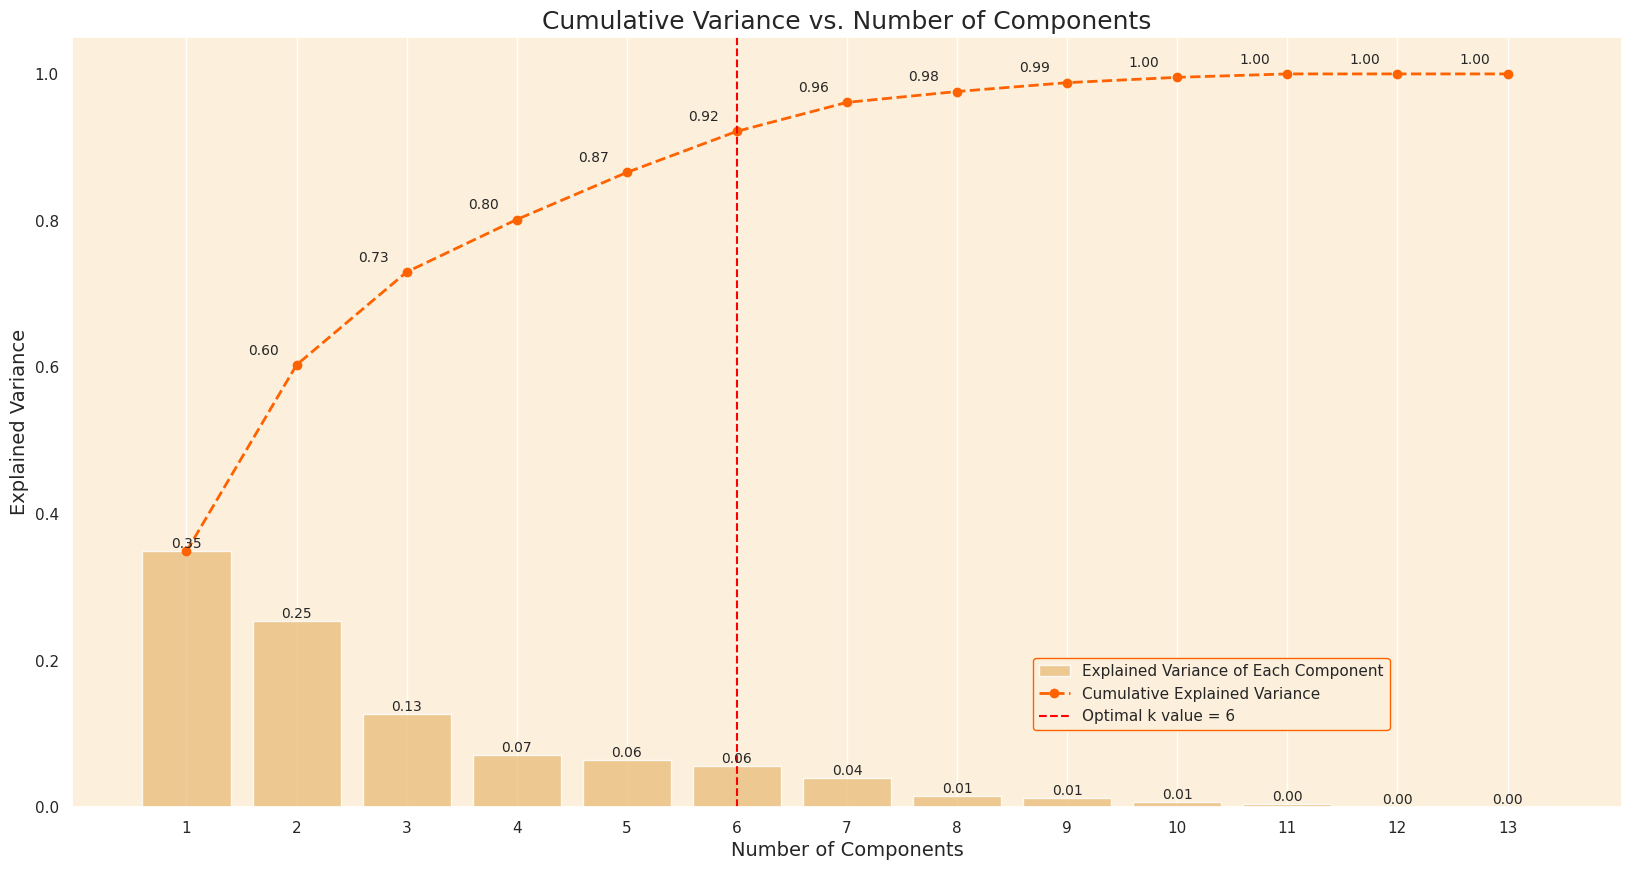

In [ ]:
# Selecting only numerical columns for PCA
numerical_columns = customer_data_scaled.select_dtypes(include=[np.number])

# Apply PCA
pca = PCA().fit(numerical_columns)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()





# **Conclusion**

The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

The first component explains approximately 28% of the variance.

The first two components together explain about 49% of the variance.

The first three components explain approximately 61% of the variance, and so on.

To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the 6th component (which captures about 81% of the total variance).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining the first 6 components might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.

In [ ]:
# Selecting only numerical columns for PCA
numerical_columns = customer_data_scaled.select_dtypes(include=[np.number])

# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numerical data
scaled_numerical_columns = scaler.fit_transform(numerical_columns)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(scaled_numerical_columns)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

# Display the first few rows of the PCA-transformed data
print(customer_data_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6
0 -1.869337  0.618317 -0.396087  0.476782  0.405086 -1.287046
1 -1.568923 -0.118480  2.079149 -0.626614  1.716665 -0.229470
2 -1.684884  0.639834 -0.547031  0.928324  0.634613 -1.487962
3 -0.794960 -0.553299  0.616433 -0.429770 -0.828179  0.658577
4  1.962847  0.619535  0.163221 -1.958535  1.145349  0.046355


In [ ]:
# Identify and exclude non-numeric columns (example exclusion)
numeric_columns = customer_data_scaled.select_dtypes(include=[np.number])

# Initialize PCA and StandardScaler
pca = PCA(n_components=6)
scaler = StandardScaler()

# Scale and fit_transform the numeric data
scaled_data = scaler.fit_transform(numeric_columns)

# Fit PCA on the scaled data
pca.fit(scaled_data)

# Create PCA components DataFrame
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=numeric_columns.columns)

# Function to highlight top 3 absolute values in each column
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color: #ffeacc' if i in top3 else '' for i in column.index]

# Apply highlighting function using .style.apply
styled_pc_df = pc_df.style.apply(highlight_top3, axis=0)

# Display styled DataFrame
styled_pc_df


,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.120256,0.315544,-0.134015,-0.088977,0.137488,-0.914022
Total_Transactions,0.314378,-0.429429,-0.019271,-0.006382,0.012098,-0.132180
Total_Products_Purchased,0.383953,-0.214443,-0.023136,0.010549,0.014391,-0.144198
Total_Spend,0.425815,0.070497,0.006046,0.005788,0.014870,-0.020801
Average_Transaction_Value,0.236785,0.564464,0.039900,0.026921,-0.026184,0.188932
Unique_Products_Purchased,0.359879,-0.287539,-0.049536,0.018462,0.016039,-0.157625
Average_Days_Between_Purchases,-0.006343,-0.024243,0.692543,-0.134380,0.707400,0.010188
Day_Of_Week,-0.027056,0.009704,-0.225315,0.891263,0.391112,0.012274
Hour,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
Monthly_Spending_Mean,0.289763,0.504722,0.020593,0.012515,-0.011861,0.108400


#**K-Means Clustering**

K-Means Clustering

K-Means:
K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the within-cluster sum-of-squares (WCSS), also known as inertia. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

 Determining the Optimal Number of Clusters

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:


*  Elbow Method
*  Silhouette Method


What is the Elbow Method?
The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

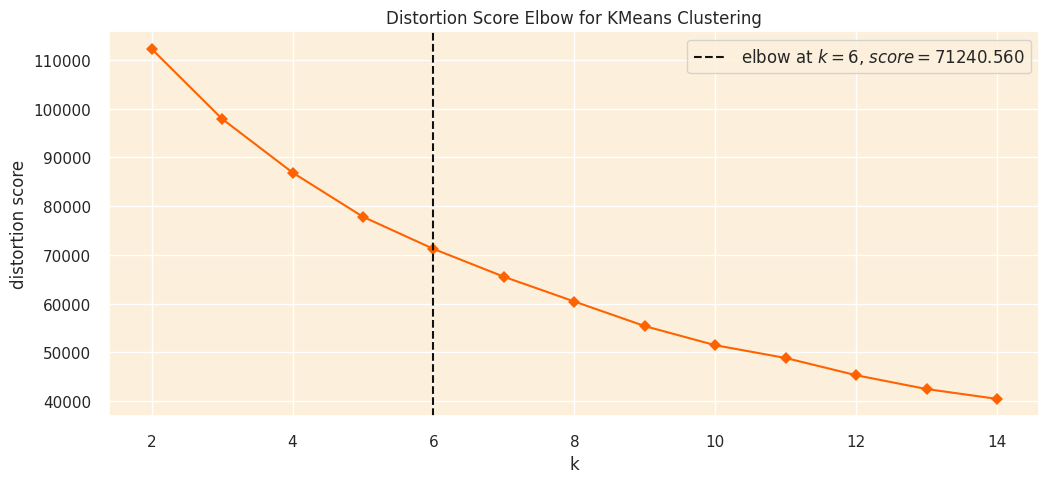

In [ ]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

Optimal k Value: Elbow Method Insights
The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 5. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between 3 and 7. To choose the best k within this range, we can employ the silhouette analysis, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# **Silhouette Method**

In [ ]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

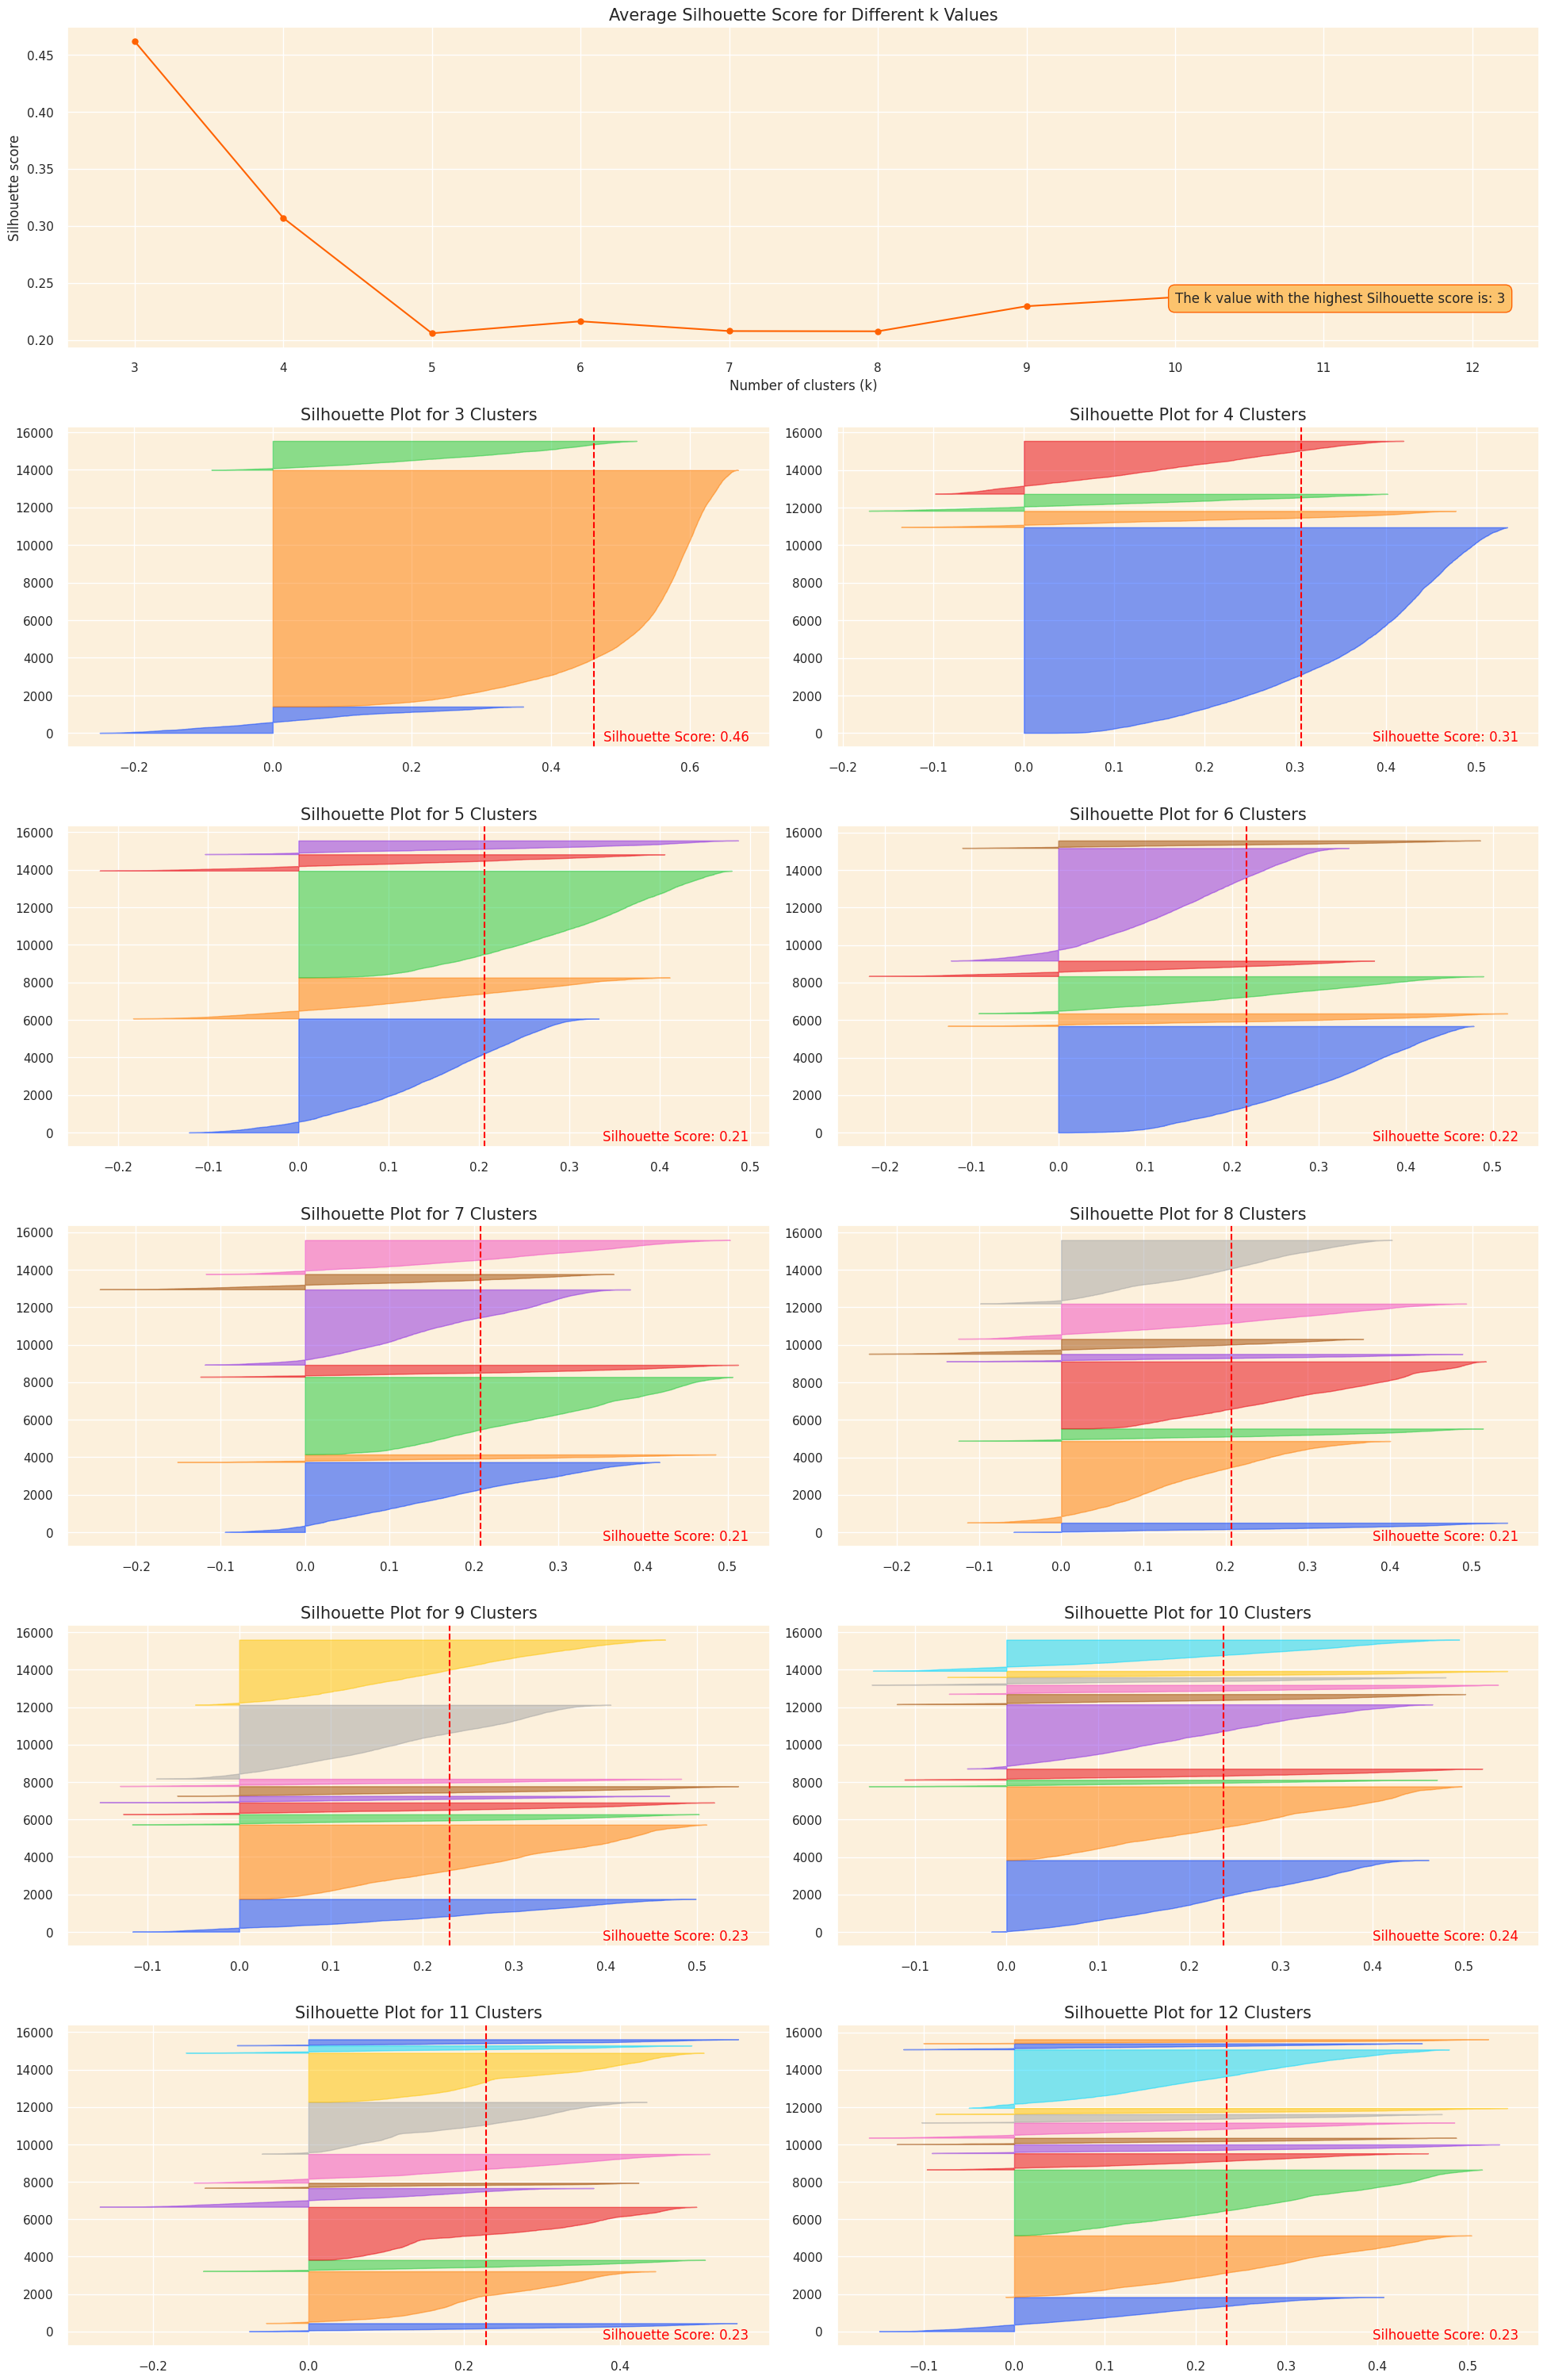

In [ ]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

**Guidelines used here to Interpret Silhouette Plots and Determine the Optimal K:**

To interpret silhouette plots and identify the optimal number of clusters (( k )), consider the following criteria:

1️⃣ Analyze the Silhouette Plots:

Silhouette Score Width:

Wide Widths (closer to +1): Indicate that the data points in the cluster are well separated from points in other clusters, suggesting well-defined clusters.
Narrow Widths (closer to -1): Show that data points in the cluster are not distinctly separated from other clusters, indicating poorly defined clusters.
Average Silhouette Score:

High Average Width: A cluster with a high average silhouette score indicates well-separated clusters.
Low Average Width: A cluster with a low average silhouette score indicates poor separation between clusters.
2️⃣ Uniformity in Cluster Size:

2.1 Cluster Thickness:

Uniform Thickness: Indicates that clusters have a roughly equal number of data points, suggesting a balanced clustering structure.
Variable Thickness: Signifies an imbalance in the data point distribution across clusters, with some clusters having many data points and others too few.
3️⃣ Peaks in Average Silhouette Score:
Clear Peaks: A clear peak in the average silhouette score plot for a specific ( k ) value indicates this ( k ) might be optimal.
4️⃣ Minimize Fluctuations in Silhouette Plot Widths:
Uniform Widths: Seek silhouette plots with similar widths across clusters, suggesting a more balanced and optimal clustering.
Variable Widths: Avoid wide fluctuations in silhouette plot widths, indicating that clusters are not well-defined and may vary in compactness.
5️⃣ Optimal Cluster Selection:
Maximize the Overall Average Silhouette Score: Choose the ( k ) value that gives the highest average silhouette score across all clusters, indicating well-defined clusters.
Avoid Below-Average Silhouette Scores: Ensure most clusters have above-average silhouette scores to prevent suboptimal clustering structures.
6️⃣ Visual Inspection of Silhouette Plots:
Consistent Cluster Formation: Visually inspect the silhouette plots for each ( k ) value to evaluate the consistency and structure of the formed clusters.
Cluster Compactness: Look for more compact clusters, with data points having silhouette scores closer to +1, indicating better clustering.

Optimal k Value: Silhouette Method Insights
Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing ( k = 3 ) is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

Clustering Model - K-means

In [ ]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [ ]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,Customer_ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,GEOGRAPHY,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,CLV,cluster
0,1,343,1,2.0,16.29,16.29,2,0.0,4,0,UK,16.29,0.0,0.0,0.103467,2
1,2,195,2,2.0,22.77,11.385,2,87.0,2,0,Germany,11.385,5.112382,7.23,0.144626,2
2,3,363,1,4.0,19.08,19.08,3,0.0,5,0,UK,19.08,0.0,0.0,0.121188,2
3,4,52,2,5.0,33.29,16.645,5,0.0,1,0,UK,16.645,14.078496,19.91,0.211444,2
4,5,179,5,14.0,248.27,49.654,2,36.5,0,0,Germany,62.0675,68.432211,-48.479,1.576908,1


In [ ]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [ ]:
pip install plotly pandas


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# **3D Visualization of Top Principal Components**

(interactive plot)

In this part, we are going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

In [ ]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

Cluster Distribution Visualization

I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:

<ipython-input-70-4e2adce43589>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




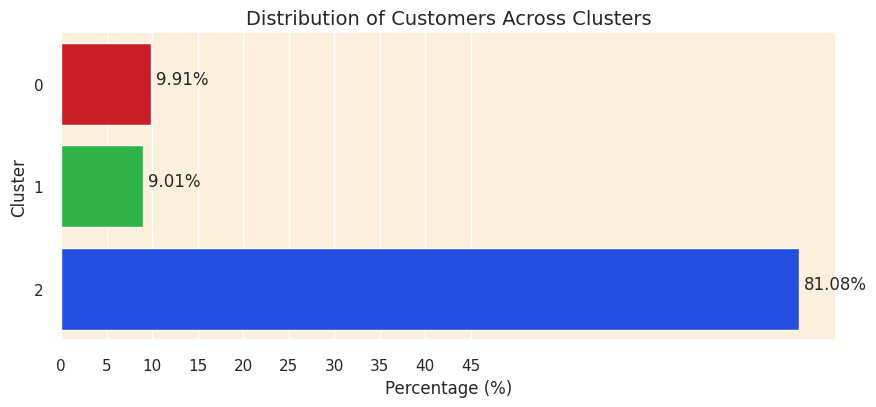

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

**Inference**
The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 0 and 1 holding around 41% of customers each and cluster 2 accommodating approximately 18% of the customers.

This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.

In [ ]:
pip install scikit-learn tabulate

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

# Evaluation Metrics

To further scrutinize the quality of our clustering, I will employ the following metrics:

Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.
Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [ ]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+-------------------+
|         Metric          |       Value       |
+-------------------------+-------------------+
| Number of Observations  |       15507       |
|    Silhouette Score     | 0.461693779243182 |
| Calinski Harabasz Score | 5560.480003986431 |
|  Davies Bouldin Score   | 1.370367044756903 |
+-------------------------+-------------------+


**Clustering Quality Inference**

The Silhouette Score of approximately 0.236, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.
The Calinski Harabasz Score is 1257.17, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.
The Davies Bouldin Score of 1.37 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.
In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.

# Radar Chart Approach

First of all, we are going to create radar charts to visualize the centroid values of each cluster across different features. This can give a quick visual comparison of the profiles of different clusters.To construct the radar charts, it's essential to first compute the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster. Subsequently, we will display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters:

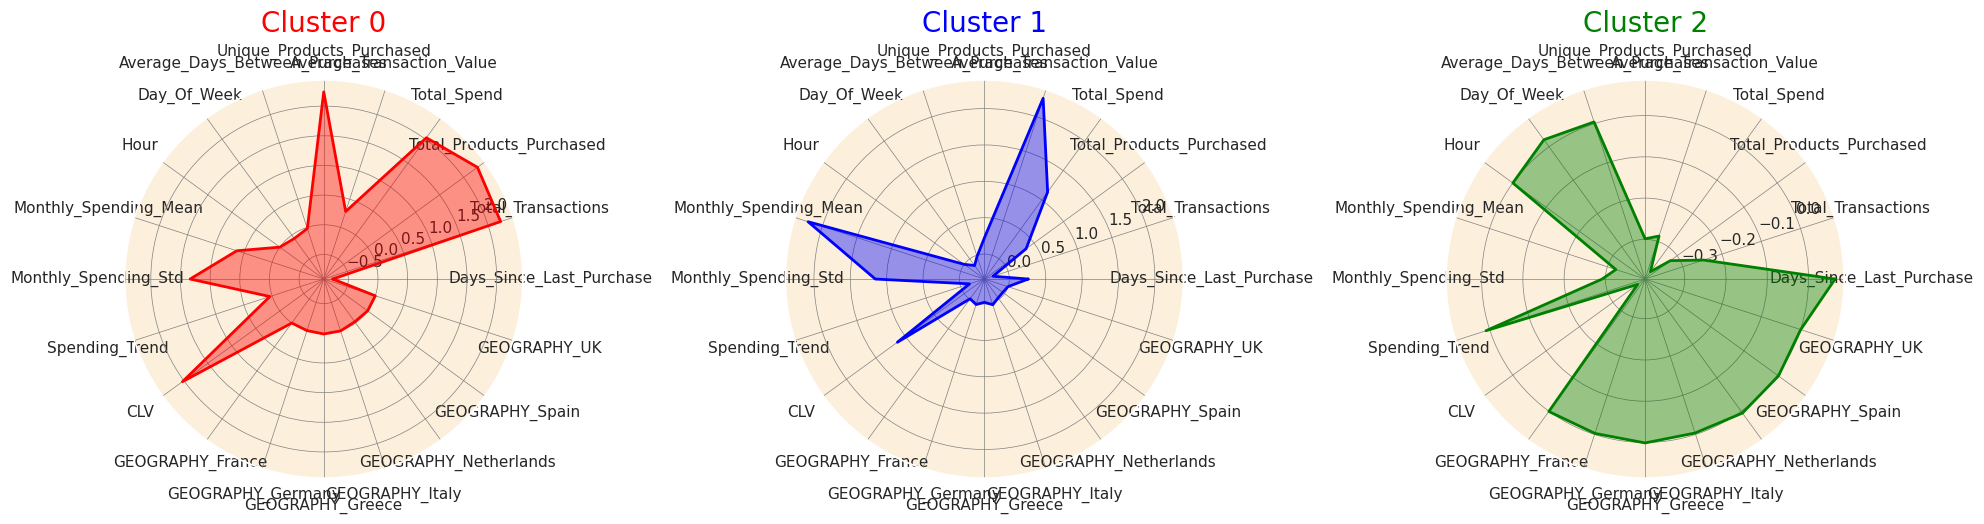

In [ ]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('Customer_ID')

# Separate the features and the cluster column
features = df_customer.drop(columns=['cluster'])
clusters = df_customer['cluster']

# One-hot encode categorical variables
features_encoded = pd.get_dummies(features)

# Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_encoded)

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(features_standardized, columns=features_encoded.columns, index=df_customer.index)
df_customer_standardized['cluster'] = clusters

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Define colors for each cluster
colors = ['red', 'blue', 'green']

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Set x-ticks and labels for all subplots
for i in range(3):
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

# Add a grid
for i in range(3):
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

# **Customer Profiles Derived from Radar Chart Analysis**

**Cluster 0 (Red Chart):**
🎯 Profile: Sporadic Shoppers with a Preference for Weekend Shopping

Customers in this cluster tend to spend less, with a lower number of transactions and products purchased.
They have a slight tendency to shop during the weekends, as indicated by the very high Day_of_Week value.
Their spending trend is relatively stable but on the lower side, and they have a low monthly spending variation (low Monthly_Spending_Std).
These customers have not engaged in many cancellations, showing a low cancellation frequency and rate.
The average transaction value is on the lower side, indicating that when they do shop, they tend to spend less per transaction.


**Cluster 1 (Green Chart):**
🎯 Profile: Infrequent Big Spenders with a High Spending Trend

Customers in this cluster show a moderate level of spending, but their transactions are not very frequent, as indicated by the high Days_Since_Last_Purchase and Average_Days_Between_Purchases.
They have a very high spending trend, indicating that their spending has been increasing over time.
These customers prefer shopping late in the day, as indicated by the high Hour value, and they mainly reside in the UK.
They have a tendency to cancel a moderate number of transactions, with a medium cancellation frequency and rate.
Their average transaction value is relatively high, meaning that when they shop, they tend to make substantial purchases.


**Cluster 2 (Blue Chart):**
🎯 Profile: Frequent High-Spenders with a High Rate of Cancellations

Customers in this cluster are high spenders with a very high total spend, and they purchase a wide variety of unique products.
They engage in frequent transactions, but also have a high cancellation frequency and rate.
These customers have a very low average time between purchases, and they tend to shop early in the day (low Hour value).
Their monthly spending shows high variability, indicating that their spending patterns might be less predictable compared to other clusters.
Despite their high spending, they show a low spending trend, suggesting that their high spending levels might be decreasing over time.

# **Histogram Chart Approach**

To validate the profiles identified from the radar charts, we can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.

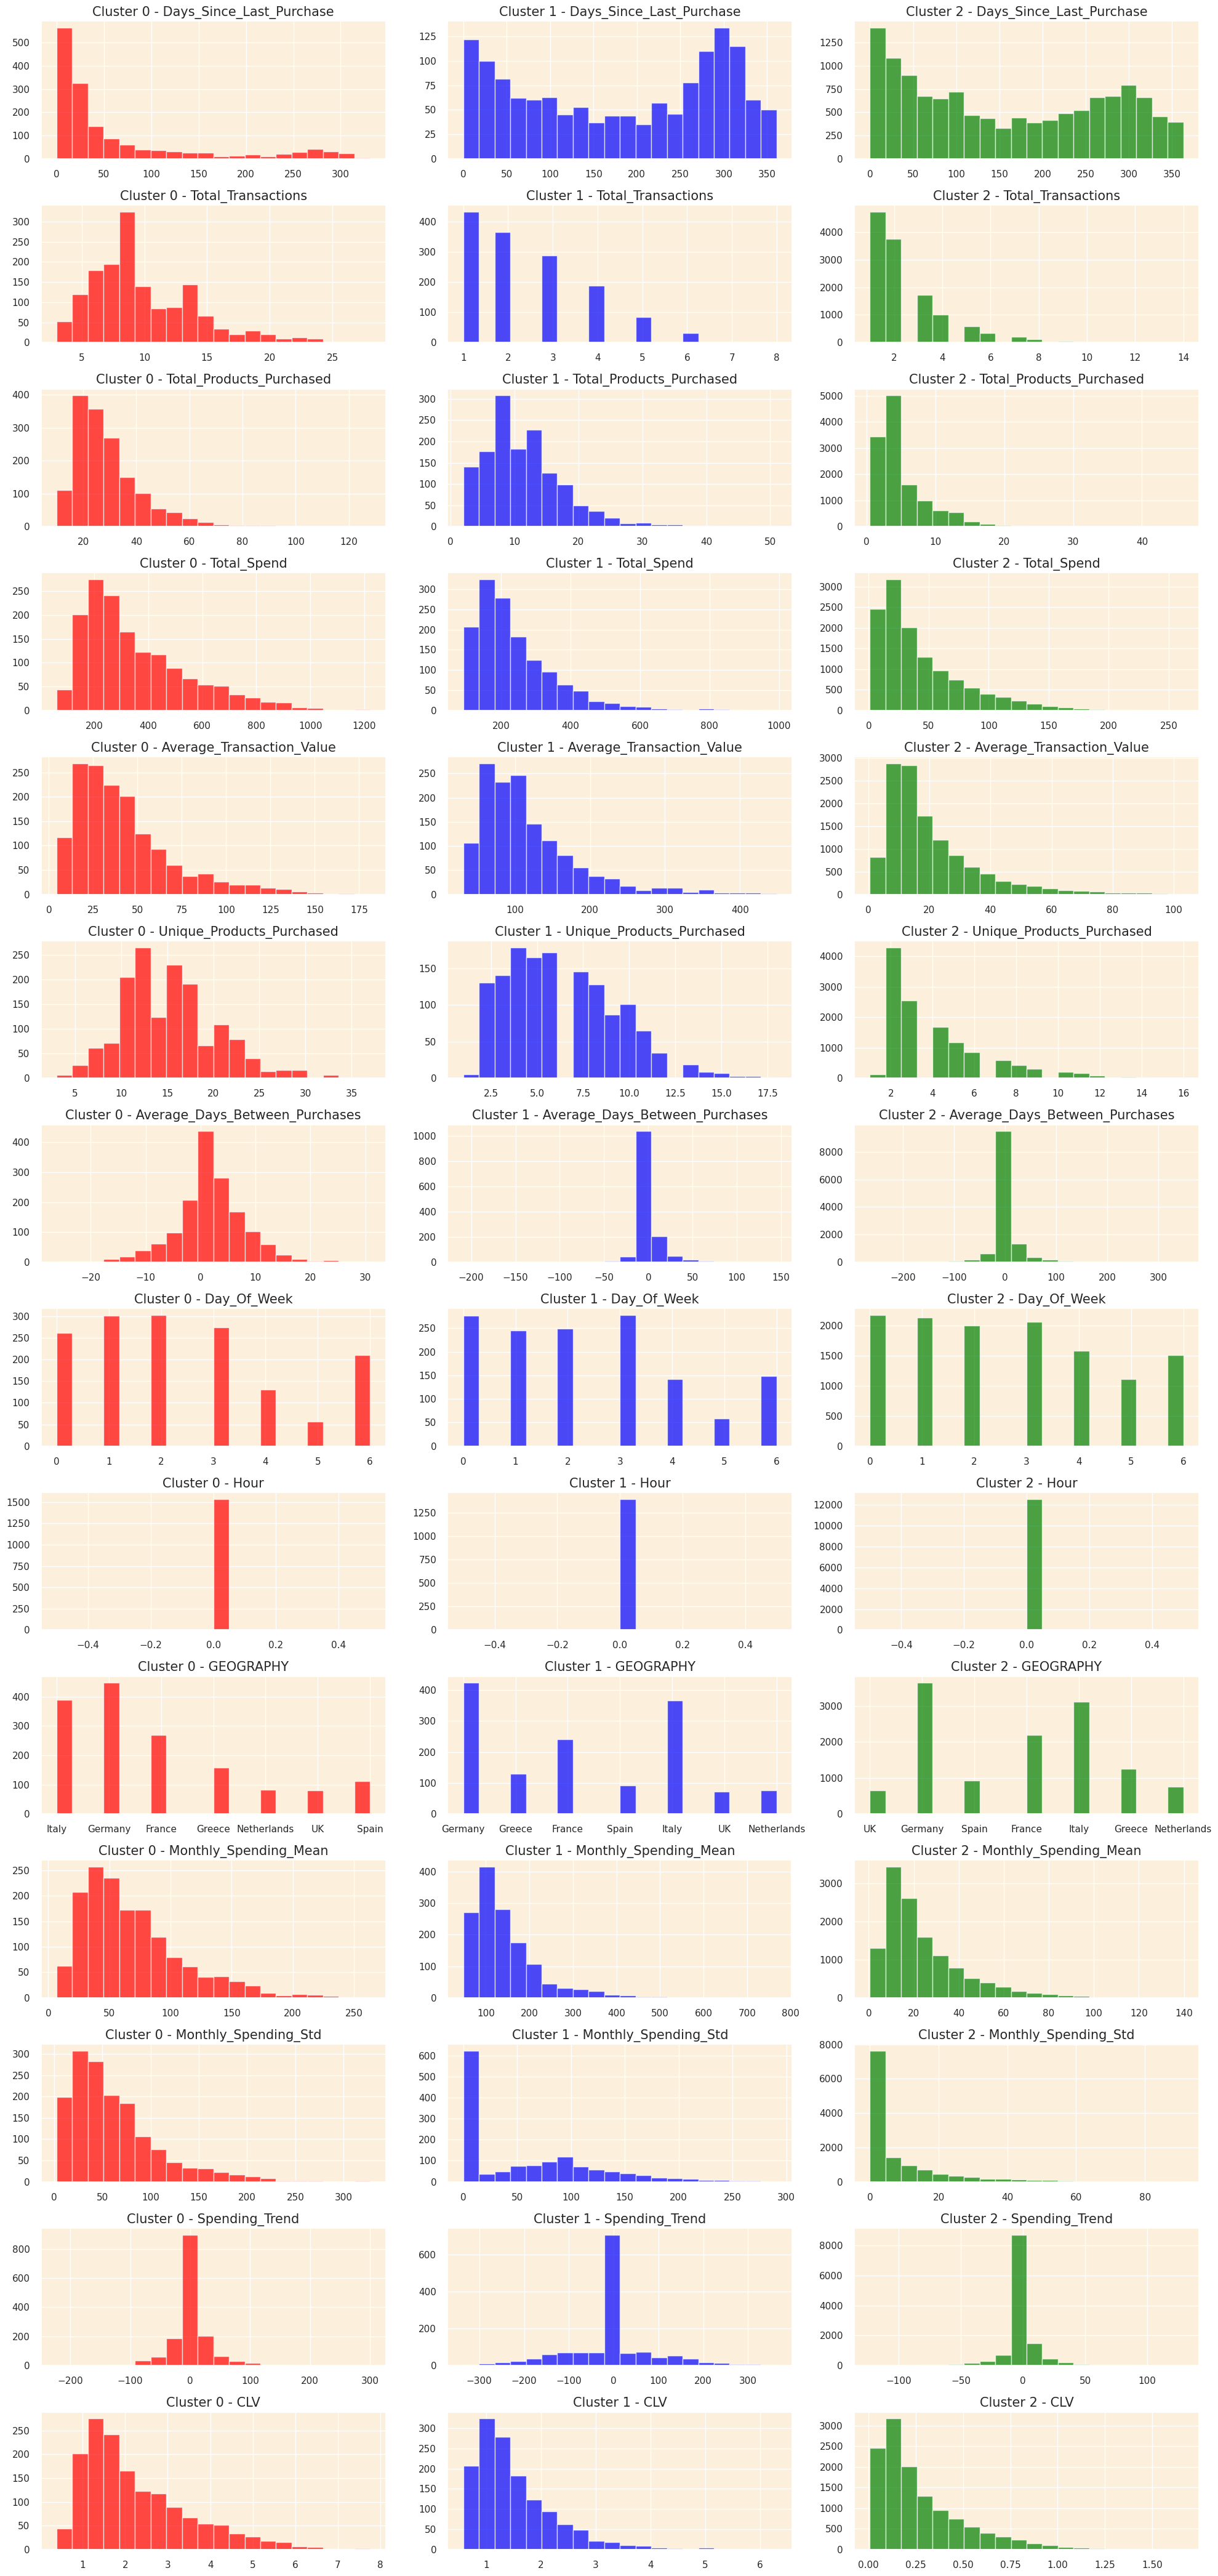

In [ ]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics for the entire dataset
overall_summary = customer_data_cleaned.describe()
print(overall_summary)

       Days_Since_Last_Purchase  Total_Transactions  Total_Products_Purchased  \
count                   15507.0             15507.0                   15507.0   
mean                 151.214484            3.106919                  8.031051   
std                  114.989973            2.998115                  9.103581   
min                         0.0                 1.0                       0.5   
25%                        40.0                 1.0                       3.0   
50%                       128.0                 2.0                       5.0   
75%                       264.0                 4.0                       9.0   
max                       363.0                28.0                     128.0   

       Total_Spend  Average_Transaction_Value  Unique_Products_Purchased  \
count      15507.0                    15507.0                    15507.0   
mean     91.595809                  31.289836                   5.341975   
std     129.446516                  38.064

In [ ]:
# Group by GEOGRAPHY and calculate summary statistics
geo_summary = customer_data_cleaned.groupby('GEOGRAPHY').describe()
print(geo_summary)

            Days_Since_Last_Purchase                                     \
                               count        mean         std  min   25%   
GEOGRAPHY                                                                 
France                        2712.0  155.169985  115.948221  0.0  43.0   
Germany                       4516.0  150.372232  115.340088  0.0  40.0   
Greece                        1539.0  148.698506  113.599913  0.0  37.0   
Italy                         3883.0  151.142158  115.428264  0.0  39.0   
Netherlands                    914.0  152.781182  116.014551  0.0  42.0   
Spain                         1133.0  148.424537  111.769089  0.0  38.0   
UK                             810.0  149.928395  113.664698  0.0  43.0   

                                 Total_Transactions            ...       CLV  \
               50%    75%    max              count      mean  ...       75%   
GEOGRAPHY                                                      ...             
France   

# Revenue

In [ ]:
# Calculate total spend if it's not already present
customer_data_cleaned['Total_Spend'] = customer_data_cleaned['Average_Transaction_Value'] * customer_data_cleaned['Total_Transactions']

# Now calculate the total company revenue
total_revenue = customer_data_cleaned['Total_Spend'].sum()
print(f"Total Company Revenue: ${total_revenue}")


Total Company Revenue: $1420376.2063


In [ ]:
customer_data_cleaned['Total_Spend'] = customer_data_cleaned['Average_Transaction_Value'] * customer_data_cleaned['Total_Transactions']
total_revenue = customer_data_cleaned['Total_Spend'].sum()
customer_data_cleaned['Total_Revenue'] = total_revenue

In [ ]:
revenue_per_country = customer_data_cleaned.groupby('GEOGRAPHY')['Total_Spend'].sum().reset_index()
print(revenue_per_country)

     GEOGRAPHY  Total_Spend
0       France   243882.582
1      Germany  426711.7947
2       Greece    137444.22
3        Italy  355758.4017
4  Netherlands   78033.3067
5        Spain  104627.3278
6           UK   73918.5734


In [ ]:
# Assuming customer_data_cleaned is your DataFrame
revenue_per_cluster = customer_data_cleaned.groupby('cluster')['Total_Spend'].sum().reset_index()
print(revenue_per_cluster)

   cluster  Total_Spend
0        0  544480.5604
1        1  333298.6475
2        2  542596.9984


In [ ]:
# Group by clusters and calculate summary statistics
cluster_summary = customer_data_cleaned.groupby('cluster').describe()
print(cluster_summary)

        Days_Since_Last_Purchase                                            \
                           count        mean         std  min   25%    50%   
cluster                                                                      
0                         1537.0    63.57905    83.35055  0.0  11.0   25.0   
1                         1397.0  180.917681  114.212865  0.0  69.0  194.0   
2                        12573.0  158.627217  113.663386  0.0  49.0  142.0   

                      Total_Transactions            ...       CLV            \
           75%    max              count      mean  ...       75%       max   
cluster                                             ...                       
0         76.0  331.0             1537.0  9.764476  ...  2.917155  7.754140   
1        290.0  361.0             1397.0  2.450966  ...  1.852947  6.306868   
2        268.0  363.0            12573.0  2.365943  ...  0.375379  1.664686   

        Total_Revenue                                   

# **Follow-up Tableau Analysis Set-Up**

As a last step, the cluster membership will be concatenated to the merged dataset. This way, each observation will contain the associated cluster membership, allowing for in depth insights of individual clusters in Tableau.

The concatenated variable will be in a "novel" dataset, saved as both .xlsx and .csv for subsequent analyses.

In [ ]:
df_customer_standardized
# check dataset to be exported for subsequent analysis

,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Monthly_Spending_Mean,...,Spending_Trend,CLV,GEOGRAPHY_France,GEOGRAPHY_Germany,GEOGRAPHY_Greece,GEOGRAPHY_Italy,GEOGRAPHY_Netherlands,GEOGRAPHY_Spain,GEOGRAPHY_UK,cluster
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1,1.667899,-0.702771,-0.662514,-0.581771,-0.394073,-0.761763,-0.075007,0.716509,0.0,-0.484840,...,0.003611,-0.581771,-0.460389,-0.641000,-0.331934,-0.577971,-0.250265,-0.280754,4.259630,2
2,0.380789,-0.369217,-0.662514,-0.531710,-0.522937,-0.761763,2.739797,-0.310187,0.0,-0.588963,...,0.207932,-0.531710,-0.460389,1.560061,-0.331934,-0.577971,-0.250265,-0.280754,-0.234762,2
3,1.841833,-0.702771,-0.442813,-0.560217,-0.320775,-0.533825,-0.075007,1.229857,0.0,-0.425614,...,0.003611,-0.560217,-0.460389,-0.641000,-0.331934,-0.577971,-0.250265,-0.280754,4.259630,2
4,-0.862838,-0.369217,-0.332962,-0.450438,-0.384747,-0.077949,-0.075007,-0.823535,0.0,-0.477304,...,0.566270,-0.450438,-0.460389,-0.641000,-0.331934,-0.577971,-0.250265,-0.280754,4.259630,2
5,0.241642,0.631444,0.655692,1.210378,0.482461,-0.761763,1.105916,-1.336883,0.0,0.486926,...,-1.366412,1.210378,-0.460389,1.560061,-0.331934,-0.577971,-0.250265,-0.280754,-0.234762,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22619,-1.080255,-0.702771,-0.662514,-0.659875,-0.659682,-0.761763,-0.075007,1.229857,0.0,-0.699455,...,0.003611,-0.659875,-0.460389,-0.641000,-0.331934,-0.577971,-0.250265,3.561836,-0.234762,2
22621,-1.132435,-0.702771,-0.552663,-0.574818,-0.370429,-0.761763,-0.075007,0.716509,0.0,-0.465735,...,0.003611,-0.574818,-0.460389,-0.641000,-0.331934,-0.577971,3.995758,-0.280754,-0.234762,2
22623,-1.228099,-0.702771,-0.552663,1.037328,5.111981,-0.761763,-0.075007,-0.823535,0.0,3.964131,...,0.003611,1.037328,-0.460389,-0.641000,-0.331934,-0.577971,-0.250265,3.561836,-0.234762,1


In [ ]:
# simplify the file name:

Final_df_capstone = df_customer_standardized

In [ ]:
from google.colab import files

# Save the modified DataFrame as an Excel and CSV file
Final_df_capstone.to_excel('Final_df_capstone.xlsx', index=True)
Final_df_capstone.to_csv('Final_df_capstone.csv', index=True)

# Download the Excel file
files.download('Final_df_capstone.xlsx')

# Download the CSV file
files.download('Final_df_capstone.csv')

print("Downloaded as 'Final_df_capstone.xlsx' and 'Final_df_capstone.csv'.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded as 'Final_df_capstone.xlsx' and 'Final_df_capstone.csv'.
